### Setup

In [1]:
!./venv/bin/pip install kaggle scikit-learn numpy matplotlib seaborn

  Using cached kaggle-1.8.3-py3-none-any.whl.metadata (16 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.4.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached black-25.12.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (86 kB)
  Using cached bleach-6.3.0-py3-none-any.whl.metadata (31 kB)
  Using cached kagglesdk-0.1.14-py3-none-any.whl.metadata (13 kB)
  Using cached mypy-1.19.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached protobuf-6.33.4-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached types_requests-2.32.4.20260107-p

In [2]:
!kaggle datasets download -d kukuroo3/body-performance-data

Dataset URL: https://www.kaggle.com/datasets/kukuroo3/body-performance-data
License(s): CC0-1.0
100%|████████████████████████████████████████| 249k/249k [00:00<00:00, 1.14MB/s]
100%|████████████████████████████████████████| 249k/249k [00:00<00:00, 1.13MB/s]


In [3]:
!unzip body-performance-data.zip

Archive:  body-performance-data.zip
  inflating: bodyPerformance.csv     


### Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

### EDA

In [2]:
body_df = pd.read_csv("./bodyPerformance.csv")

In [5]:
body_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
body_df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [3]:
body_df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Numerical Distributions

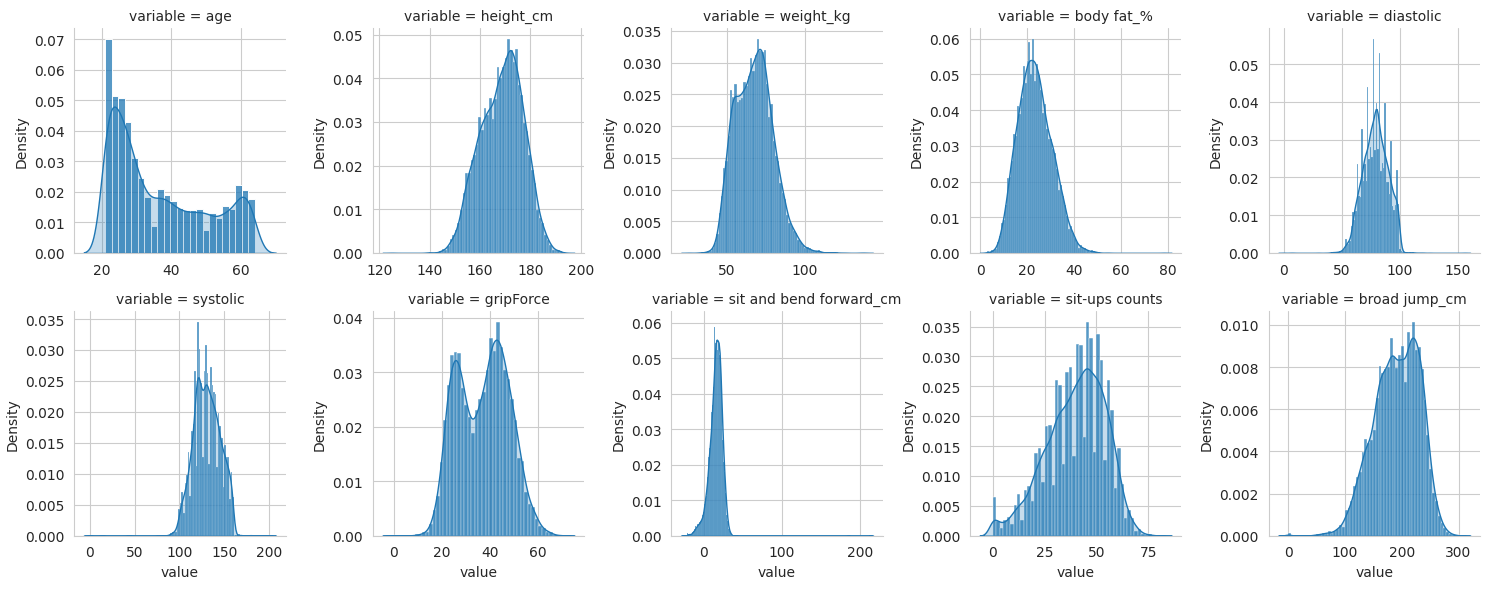

In [7]:
kde_cols = ["age", "height_cm",	"weight_kg", "body fat_%", "diastolic",	"systolic",	"gripForce", "sit and bend forward_cm",	"sit-ups counts", "broad jump_cm"]

with sns.axes_style('whitegrid'):
  nd = pd.melt(body_df, value_vars=kde_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=5, sharex=False, sharey=False)

  n1.map(
      sns.histplot,
      'value',
      stat='density',
  )

  n1.map(
      sns.kdeplot,
      'value',
      fill=True
  )

Class Count

/Users/maxim/Documents/work/sigmoid_hw/09_Support_Vector_Machine/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


class  gender
C      M         2237
D      M         2204
B      M         2162
A      M         1864
       F         1484
B      F         1185
D      F         1145
C      F         1112
Name: count, dtype: int64

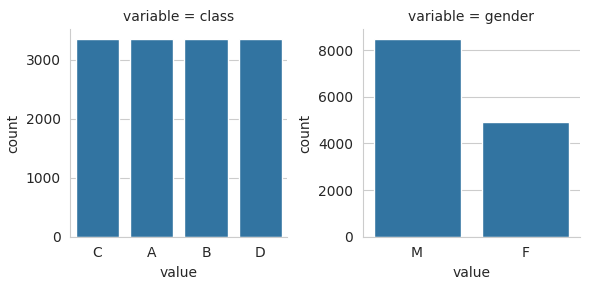

In [15]:
count_cols = ["class", "gender"]

with sns.axes_style('whitegrid'):
  nd = pd.melt(body_df, value_vars=count_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=2, sharex=False, sharey=False)
  n1 = n1.map(sns.countplot, 'value')

body_df[count_cols].value_counts()

In [3]:
clean_df = body_df.copy()

Encode Gender

In [4]:
cat_cols = ["gender"]

clean_df = pd.get_dummies(clean_df, columns=cat_cols, drop_first=True, dtype=int)

Encode Class

In [5]:
class_mapping = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
clean_df['class'] = clean_df['class'].map(class_mapping)

In [6]:
clean_df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,1,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,0,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,3,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0,0


#### Correlation Analysis

There are quite a few interesting physiological insights from the correlation map:
- `age` is inverse proportional to all physical metrics, such as grip force, sit ups, jumps etc, but direct proportional to body fat (with age people tend to gain weight)
- `body fat_%` negatively affects physical performance (inverse proportional with physical metrics)
- For the given dataset, the main features that correlate to `class` are `sit and bend forward_cm ` (0.58) and `sit-ups counts` (0.45)

age                       -0.065612
height_cm                 -0.037753
weight_kg                 -0.214129
body fat_%                -0.341956
diastolic                 -0.066761
systolic                  -0.035484
gripForce                  0.136088
sit and bend forward_cm    0.588123
sit-ups counts             0.452832
broad jump_cm              0.262154
class                      1.000000
gender_M                  -0.075605
Name: class, dtype: float64


<Axes: >

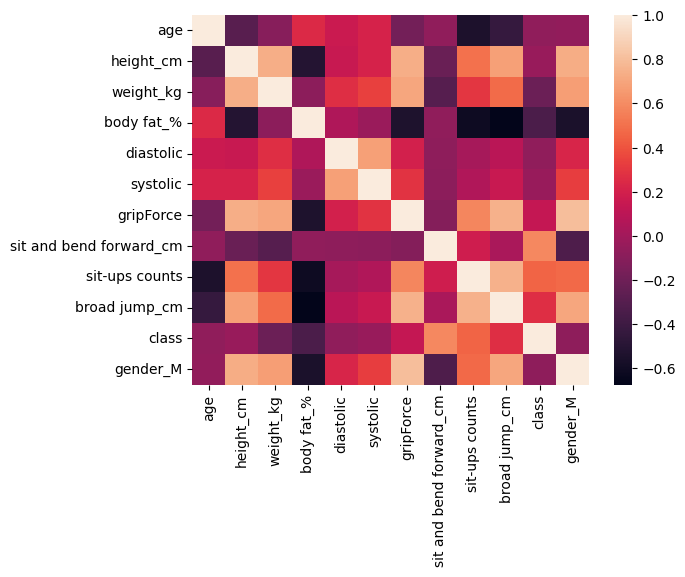

In [37]:
corr = clean_df.corr()
print(corr["class"])
sns.heatmap(corr)

### Splitting the Dataset

In [7]:
X = clean_df.drop(columns=['class'])
y = clean_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scalers

#### Defining Functions

In [8]:
labels = ['D', 'C', 'B', 'A']

In [54]:
def plot_conf_matrix(clf, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    
    disp.plot()
    return cm

In [114]:
def perf_eval(y_test, y_pred):
    print(classification_report(y_test, y_pred, target_names=labels))

In [111]:
acc_df = pd.DataFrame()

def save_stats(column, acc):
    keys = [key for key in acc]
    classes = keys[:4]
    acc_df[column] = pd.Series()
    for cls in classes:
        stats = acc[cls]
        stats_keys = [key for key in stats]
        for stat in stats_keys[::2]:
            acc_df.loc[f"{cls}_{stat}", column] = acc[cls][stat]

    acc_df.loc["accuracy", column] = acc["accuracy"]

In [84]:
def scaler_clf(scaler, model, column):
    clf_ss = make_pipeline(scaler, model)
    clf_ss.fit(X_train, y_train)

    y_pred = clf_ss.predict(X_test)
    perf_eval(y_test, y_pred)

    class_rep_dict = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
    save_stats(column, class_rep_dict)

    plot_conf_matrix(clf_ss, y_test, y_pred)

In [112]:
acc_df = pd.DataFrame()

#### No Scaler

              precision    recall  f1-score   support

           D       1.00      0.00      0.00       682
           C       0.24      0.99      0.39       650
           B       0.37      0.02      0.03       662
           A       0.86      0.03      0.05       685

    accuracy                           0.25      2679
   macro avg       0.62      0.26      0.12      2679
weighted avg       0.63      0.25      0.12      2679



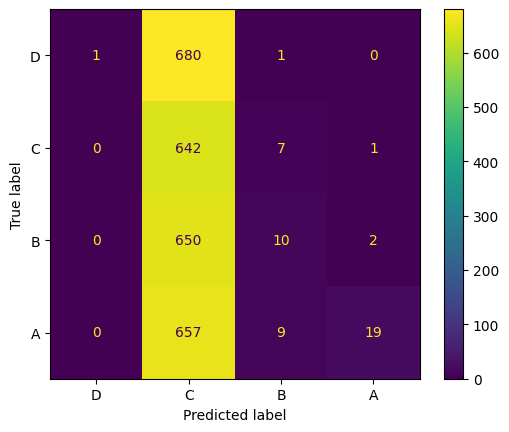

In [115]:
dummy_scaler = FunctionTransformer(lambda x: x, validate=False)

scaler_clf(dummy_scaler, SVC(gamma='auto'), 'initial')

#### StandardScaler

              precision    recall  f1-score   support

           D       0.89      0.79      0.84       682
           C       0.66      0.65      0.66       650
           B       0.54      0.56      0.55       662
           A       0.72      0.78      0.75       685

    accuracy                           0.70      2679
   macro avg       0.70      0.70      0.70      2679
weighted avg       0.71      0.70      0.70      2679



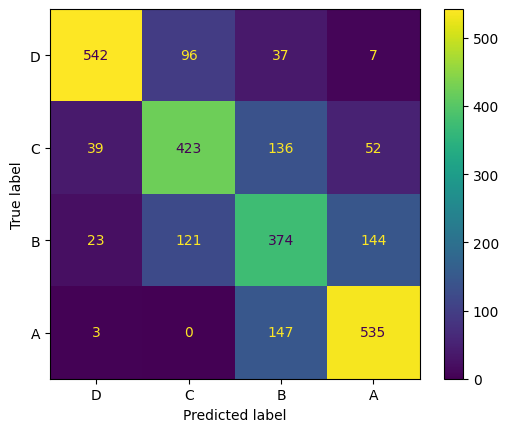

In [116]:
scaler_clf(StandardScaler(), SVC(gamma='auto'), 'standard_scaler')

#### Min Max Scaler

              precision    recall  f1-score   support

           D       0.81      0.72      0.77       682
           C       0.50      0.55      0.52       650
           B       0.40      0.37      0.38       662
           A       0.64      0.70      0.67       685

    accuracy                           0.59      2679
   macro avg       0.59      0.59      0.59      2679
weighted avg       0.59      0.59      0.59      2679



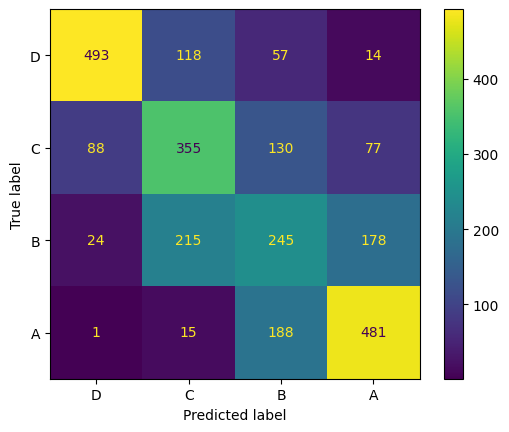

In [117]:
scaler_clf(MinMaxScaler(), SVC(gamma='auto'), 'min_max_scaler')

#### Max Abs Scaler

              precision    recall  f1-score   support

           D       0.82      0.72      0.77       682
           C       0.49      0.55      0.52       650
           B       0.39      0.35      0.37       662
           A       0.64      0.71      0.67       685

    accuracy                           0.58      2679
   macro avg       0.59      0.58      0.58      2679
weighted avg       0.59      0.58      0.58      2679



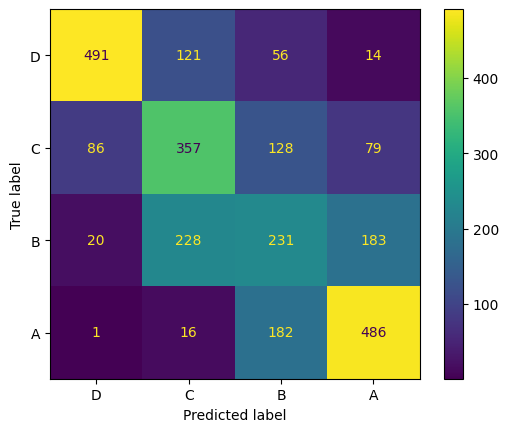

In [118]:
scaler_clf(MaxAbsScaler(), SVC(gamma='auto'), 'max_abs_scaler')

#### Stats

Best performance was achieved using StandardScaler. This can be motivated by the fact that most features are distributed similarly to normal distribution, and the range of [-1, 1] seems a better choice than MinMaxScaler's [0, 1] range. MaxAbsScaler only makes sure that no absolute value is larger than 1. Since StandardScaler use [-1, 1], the model know the distance to normal value, and can better predict the performance class.

In [119]:
acc_df

,initial,standard_scaler,min_max_scaler,max_abs_scaler
D_precision,1.0,0.892916,0.813531,0.82107
D_f1-score,0.002928,0.840962,0.765528,0.767188
C_precision,0.244199,0.660937,0.504979,0.49446
C_f1-score,0.391583,0.655814,0.52476,0.520408
B_precision,0.37037,0.538905,0.395161,0.386935
B_f1-score,0.029028,0.551622,0.382215,0.366958
A_precision,0.863636,0.724932,0.641333,0.637795
A_f1-score,0.053748,0.751933,0.670383,0.671735
accuracy,0.25084,0.699515,0.587533,0.584173


### Kernels

In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Choosing two cols for decision boundary
kernel_cols = ["sit and bend forward_cm", "sit-ups counts"]

For these two features, the points overlap in 2D, however there still is room to separate them with hyperplanes. We can see that the decision boundary for each kernel are very different. Note that the color might not match the legend due to their overlapping with low alpha.

Linear kernel has the second best accuracy among all kernels, likely due to the fact that the outliers did not influence the line to separate the classes.

Polynomial kernel decision boundary got influenced by the outliers on the far right side of the plot, which worsened its prediction accuracy.

RBF kernel has separated the classes quite successfully, assuming that in hyperspace the points had a much clearer separation. However, we can see that it also overfit to some of the outliers on the far right side.

Sigmoid kernel does not look like a good choice for the given data (also considering its lower score), since it has not been able to find clear boundaries for each class.

linear score: 0.5386338185890257
poly score: 0.4830160507652109
rbf score: 0.5696155281821575
sigmoid score: 0.3366927958193356


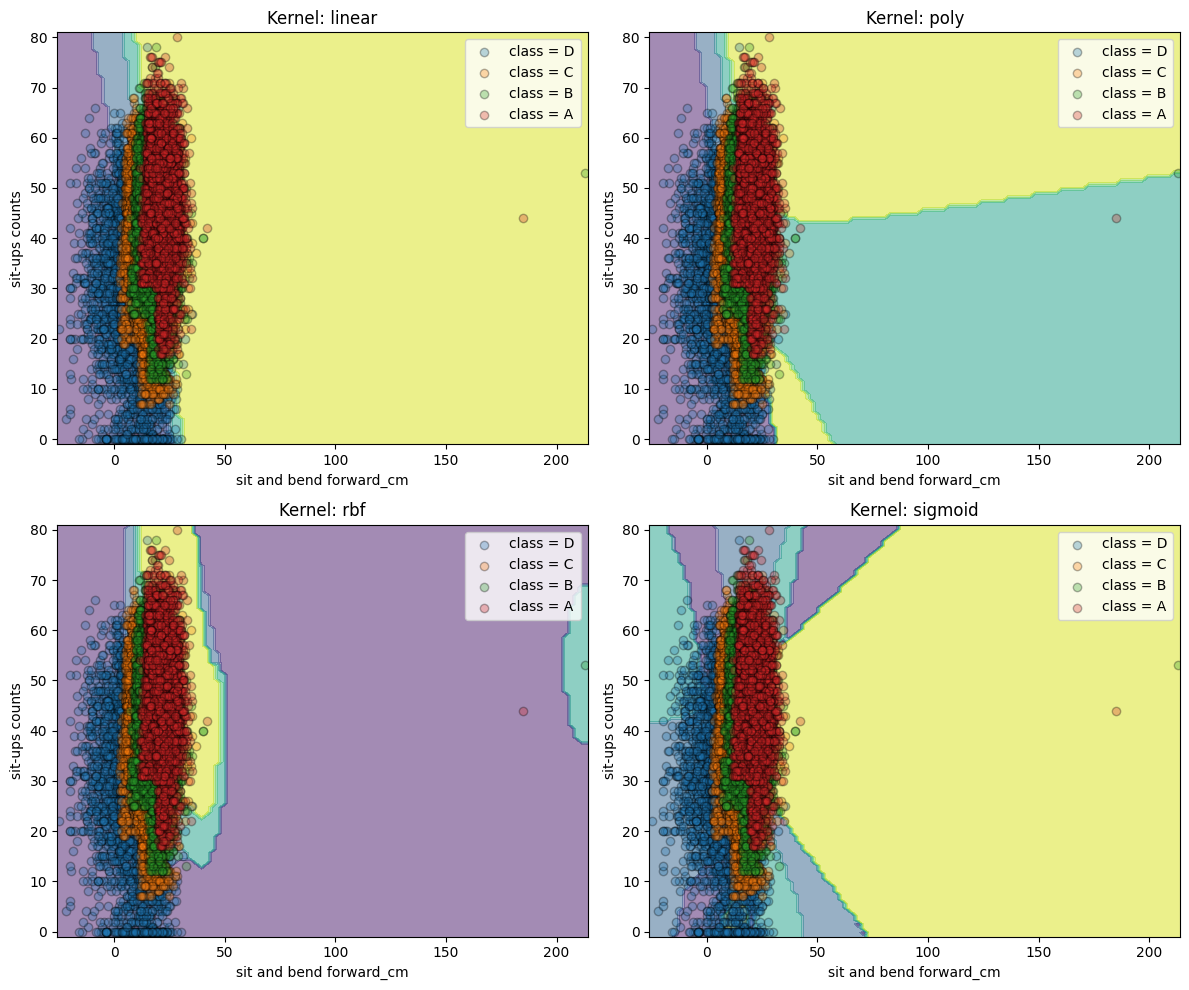

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

axs_iter = iter(axs.ravel())

for kernel in kernels:
    pipeline = make_pipeline(StandardScaler(), SVC(kernel=kernel, gamma='auto'))    
    pipeline.fit(X_train[kernel_cols], y_train)

    y_pred = pipeline.predict(X_test[kernel_cols])
    print(f"{kernel} score: {pipeline.score(X_test[kernel_cols], y_test)}")

    ax = next(axs_iter)

    DecisionBoundaryDisplay.from_estimator(
      pipeline,
      X[kernel_cols],
      ax=ax,
      response_method="predict",
      xlabel=kernel_cols[0],
      ylabel=kernel_cols[1],
      alpha=0.5
    )

    for i in range(4):
      idx = (y == i)

      ax.scatter(
        X.loc[idx, kernel_cols[0]],
        X.loc[idx, kernel_cols[1]],
        label=f"class = {labels[i]}",
        edgecolor="black",
        alpha=0.3
      )
    
    ax.set_title(f'Kernel: {kernel}')
    ax.legend()

plt.tight_layout()